<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo39/blob/main/ACTIVIDAD_SEMANAL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD SEMANAL 4


*   JUAN FELIPE TORO SALGADO --- MATRICULA: A01794247
*   ALEJANDRA ISLAS ------MATRICULA:A01794452
*   PROFESOR:Jobish Vallikavungal Devassia 
11 de Octubre del 2022



In [7]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
datos="https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

SE REALIZA LA LECTURA Y LIMPIEZA DE DATOS

In [8]:
#Primero se importan los datos desde el raw data y después se genera una copia en la variable df.
datosdf= pd.read_csv(datos)
df = datosdf.copy()


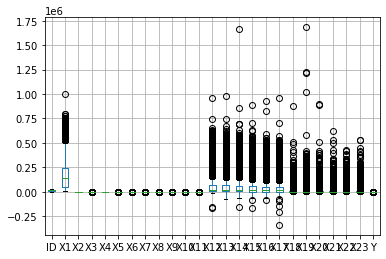

In [9]:
#Aqui es donde se hace la limpieza de los datos vacíos.
df.X5.fillna(df.X5.mean(), inplace=True)
df.dropna(inplace = True)
df.boxplot()

SE  SELECCIONAN LOS VALORES SON NUMERICOS Y NO CATEGORICOS DEBIDO A ESTO SE TRABAJN LAS COLMNAS SELECCIONADAS

In [ ]:
#Se especifican exactamente los atributos que tienen variables tipo numericas. 
ndf = df[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']]


Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

SE REALIZA LA NORMALIZACION

In [ ]:
#Se normalizan los datos numericos desde el inicio para no tener problema con ello.
ndf = pd.DataFrame(StandardScaler().fit_transform(ndf))
ndf.columns = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']


SE REALIZA EL PCA

In [ ]:
pcs = PCA(n_components=14)

pcs.fit(ndf[['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_) 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432957,0.422792,0.422792
1,1.310005,0.122575,0.545367
2,1.022245,0.074639,0.620006
3,0.961779,0.066071,0.686077
4,0.940055,0.063120,0.749196
5,0.934203,0.062336,0.811533
6,0.882949,0.055684,0.867216
7,0.852433,0.051901,0.919118
8,0.840994,0.050518,0.969635
9,0.514242,0.018888,0.988524


In [ ]:
pcsSummary1 = pcsSummary.transpose()
pcsSummary1.round(4)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.4330,1.3100,1.0222,0.9618,0.9401,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
pcsSummary1.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','PC13', 'PC14']
pcsSummary1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432957,1.310005,1.022245,0.961779,0.940055,0.934203,0.882949,0.852433,0.840994,0.514242,0.266499,0.202647,0.159195,0.152459
Proportion of variance,0.422792,0.122575,0.074639,0.066071,0.063120,0.062336,0.055684,0.051901,0.050518,0.018888,0.005073,0.002933,0.001810,0.001660
Cumulative proportion,0.422792,0.545367,0.620006,0.686077,0.749196,0.811533,0.867216,0.919118,0.969635,0.988524,0.993596,0.996530,0.998340,1.000000


ESTE ME INDICA EL NUMERO DE COMPONENTES PRINCIPALES  MINIMO EN DONDE LOS PRIMEROS 8 COMPONENTES  REPRESENTAN MAS DEL 91% DE LA VARIACION TOTAL ASOCIADA CON LAS 14 VARIABLES ORIGINALES.

In [ ]:
pcsSummary1.iloc[2,7]

0.9191177300003252

In [ ]:
B = 1-(pcsSummary1.iloc[1,0] + pcsSummary1.iloc[1,1]+pcsSummary1.iloc[1,2]+pcsSummary1.iloc[1,3]+pcsSummary1.iloc[1,4]+pcsSummary1.iloc[1,5]+pcsSummary1.iloc[1,6]+pcsSummary1.iloc[1,7])
B

0.08088226999967485

Paso 2: Interprete cada componente principal en términos de las variables originales

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),columns=pcsSummary1.columns,
                                index=ndf.iloc[:,:].columns
                                )
pcsComponents_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165522,0.300782,-0.378350,-0.200527,0.034696,-0.078372,0.111243,-0.049369,-0.821868,-0.029175,-0.006145,0.015718,-0.000441,0.003344
X5,0.032787,0.071858,-0.869702,0.338702,-0.039097,0.070979,-0.078796,0.028591,0.330127,-0.009017,0.000129,-0.001380,0.000137,0.001067
X12,0.372426,-0.190870,-0.034183,-0.064039,0.041161,-0.044041,0.008174,0.009448,0.010290,0.566731,0.415924,-0.433046,-0.183839,-0.316545
X13,0.383243,-0.174657,-0.001853,0.007370,0.083063,-0.028996,-0.032340,-0.135664,0.017387,0.386865,0.038416,0.344950,0.329662,0.645182
X14,0.388256,-0.126913,0.034706,0.060509,0.114167,0.098819,-0.121294,0.092835,-0.018943,0.122842,-0.484649,0.495927,-0.086506,-0.527631
X15,0.391550,-0.120406,0.034038,0.074801,0.028588,0.014358,0.126436,0.039227,0.018909,-0.205285,-0.523241,-0.489417,-0.362301,0.346145
X16,0.388498,-0.105950,0.033869,0.039638,-0.106943,-0.099053,-0.007607,0.049752,0.023434,-0.420011,0.068140,-0.249725,0.718303,-0.226759
X17,0.380660,-0.094216,0.018531,-0.070255,-0.164916,0.069785,0.007955,0.000137,0.058760,-0.488829,0.513516,0.338689,-0.427507,0.072341
X18,0.135164,0.383274,0.173490,0.361363,0.226137,0.039815,-0.201097,-0.749008,0.022982,-0.056548,0.047619,-0.069337,-0.044925,-0.084583
X19,0.116790,0.408294,0.200803,0.346457,0.150515,0.407194,-0.279520,0.577801,-0.112781,0.050850,0.147266,-0.068902,0.038965,0.124890


In [ ]:
pcsComponents_df.PC1.idxmax()

'X15'

In [ ]:
pcsComponents_df.PC1.nlargest(3)

X15    0.391550
X16    0.388498
X14    0.388256
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC8.idxmin()

'X18'

In [ ]:
pcsComponents_df.PC8.nsmallest(3)

X18   -0.749008
X22   -0.163064
X13   -0.135664
Name: PC8, dtype: float64

Paso 3: Identifique valores atípicos

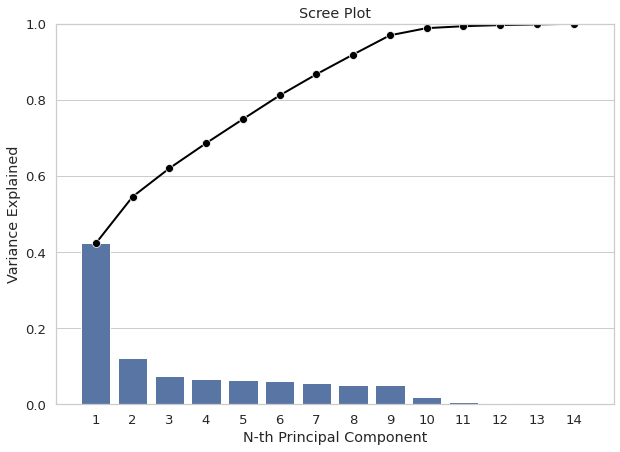

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

1. ¿Cuál es el número de componentes mínimo y por qué?
* LOS PRIMEROS 8 COMPONENTES REPRESENTAN MAS DEL 91% DE LA VARIACION TOTAL
ASOCIADA CON LAS 14 VARIABLES ORIGINALES
2. ¿Cuál es la variación de los datos que representan esos componentes?
* ES DEL 91.9% DE VARIACION DE LOS DATOS QUE REPRESENTAN ESOS COMPONENTES
3. ¿Cuál es la pérdida de información después de realizar PCA?
LA PERDIDA ES DEL 8.08% DE VARIAILIDAD EN LA INFORMACION
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
* LA VARIABLE X15 (LA CANTIDAD DE ESTADO DE CUENTA DE JUNIO) ES LA QUE TIENE MAYOR IMPORTACIA  DE LOS COMPONENTES PRINCIPALES
* LA VARIABLE  X12 (EL MONTO PAGADO EN SEPTIEMBRE) ES LA QUE TIENE MENOR IMPORTACIA  DE LOS COMPONENTES PRINCIPALES
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
* SE RECOMIENDA REALIZAR PCA CUANDO SE TIENEN UN GRAN VOLUMEN DE DATOS DEBIDO A QUE ESTE METODO NOS PERMITE  SIMPLIFICAR LA COMPLEJIDAD DE LOS ESPACIOS MUESTRALES CON MUCHAS DIMENCIONES A LA VEZ QUE SE CONCERVE LA INFORMACION,ES DECIR, PERMITE CONDENZAR  LA INFORMACION APORTADA POR MULTIPLES VARIABLES EN POCOS COMPONENTES.ESETE METODO PERMITE DISMINUIR EL TIEMPO NECESARIO PARA ENTRENAN AL MODELO, YA QUE ELIMINA LA CORRELACION ENTRE ENTIDADES UNA VEZ SE IMPLEMENTA EL PCA LOS COMPONENTES PRINCIPALES SON INDEPENDIENTES,MEJORA EL RENDIMIENTO DEL ALGORITMO QUITANDO LAS VARIABLES QUE NO CONTRIBULLEN A LA TOMA DE DECICIONES , MEJORA LA VISUALIZACION DE LOS DATOS PERMITIENDO ENTENDER DATOS CON MUCHAS DIMENCIONES Y ADEMAS PERMITE ENCONTRAR PATRONES EN UN GRAN VOLUMEN DE DATOS SIENDO ASI UNA AYUDA IDEAL PARA LOS MODELOS DE MACHINE LEARNING 